In [2]:
import os
import keras
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image, ImageChops
from sklearn.neighbors import KernelDensity
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory, array_to_img, img_to_array, load_img

In [3]:
batch_size = 64
SIZE = 128
datagen = ImageDataGenerator(rescale=1./255)
train_data = datagen.flow_from_directory(
    '../rawData/train/',
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )

datagen = ImageDataGenerator(rescale=1./255)
validation_data = datagen.flow_from_directory(
    '../rawData/validation/',
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )

datagen = ImageDataGenerator(rescale=1./255)
anomaly_data = datagen.flow_from_directory(
    '../rawData/anomaly/',
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )


Found 391 images belonging to 1 classes.
Found 40 images belonging to 1 classes.
Found 70 images belonging to 4 classes.


In [4]:
#Define the autoencoder.  
# input shape must be the same size as the images that will be fed into it by the generators
# The output layer must be the same dimensions as the original image
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same',activation='relu', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2,2), padding='same')) # using pool_size (2,2) makes the layer 2x smaller in height and width

model.add(Conv2D(8,(3, 3),activation='relu',  padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(4,(3, 3),activation='relu',  padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#-------------------------
model.add(Conv2D(4,(3, 3),activation='relu',  padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(8,(3, 3),activation='relu',  padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(16,(3, 3),activation='relu',  padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3,(3, 3), activation='sigmoid', padding='same'))
#-------------------------

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 4)         292       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 4)         0

In [5]:
# Training the model
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10) # Early stopping (stops training when validation doesn't improve for {patience} epochs)
model_filepath = '../models/model1.x'
save_best = keras.callbacks.ModelCheckpoint(model_filepath, monitor='val_loss', save_best_only=True, mode='min') # Saves the best version of the model to disk (as measured on the validation data set)
model.fit(
        train_data,
        epochs=40,
        shuffle = True,
        validation_data = validation_data,
        callbacks=[es, save_best])

Epoch 1/40
7/7 [==============================] - ETA: 0s - loss: 0.1036INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 22s 4s/step - loss: 0.1036 - val_loss: 0.0881
Epoch 2/40
7/7 [==============================] - ETA: 0s - loss: 0.0984INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 20s 3s/step - loss: 0.0984 - val_loss: 0.0804
Epoch 3/40
7/7 [==============================] - ETA: 0s - loss: 0.0867INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 20s 3s/step - loss: 0.0867 - val_loss: 0.0675
Epoch 4/40
7/7 [==============================] - ETA: 0s - loss: 0.0689INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 20s 3s/step - loss: 0.0689 - val_loss: 0.0467
Epoch 5/40
7/7 [==============================] - ETA: 0s - loss: 0.0434INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 20s 3s/step - loss: 0.0434 - val_loss: 0.0207
Epoch 6/40
7/7 [==============================] - ETA: 0s - loss: 0.0213INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 21s 3s/step - loss: 0.0213 - val_loss: 0.0202
Epoch 7/40
7/7 [==============================] - ETA: 0s - loss: 0.0196INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 21s 3s/step - loss: 0.0196 - val_loss: 0.0157
Epoch 8/40
7/7 [==============================] - ETA: 0s - loss: 0.0155INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 21s 3s/step - loss: 0.0155 - val_loss: 0.0117
Epoch 9/40
7/7 [==============================] - ETA: 0s - loss: 0.0135INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 20s 3s/step - loss: 0.0135 - val_loss: 0.0108
Epoch 10/40
7/7 [==============================] - 20s 3s/step - loss: 0.0128 - val_loss: 0.0111
Epoch 11/40
7/7 [==============================] - 20s 3s/step - loss: 0.0125 - val_loss: 0.0113
Epoch 12/40
7/7 [==============================] - ETA: 0s - loss: 0.0122INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 20s 3s/step - loss: 0.0122 - val_loss: 0.0107
Epoch 13/40
7/7 [==============================] - ETA: 0s - loss: 0.0118INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 20s 3s/step - loss: 0.0118 - val_loss: 0.0101
Epoch 14/40
7/7 [==============================] - ETA: 0s - loss: 0.0109INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 20s 3s/step - loss: 0.0109 - val_loss: 0.0094
Epoch 15/40
7/7 [==============================] - ETA: 0s - loss: 0.0101INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 21s 3s/step - loss: 0.0101 - val_loss: 0.0088
Epoch 16/40
7/7 [==============================] - ETA: 0s - loss: 0.0091INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 21s 3s/step - loss: 0.0091 - val_loss: 0.0080
Epoch 17/40
7/7 [==============================] - ETA: 0s - loss: 0.0082INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 21s 3s/step - loss: 0.0082 - val_loss: 0.0072
Epoch 18/40
7/7 [==============================] - ETA: 0s - loss: 0.0073INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 21s 3s/step - loss: 0.0073 - val_loss: 0.0065
Epoch 19/40
7/7 [==============================] - ETA: 0s - loss: 0.0067INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 21s 3s/step - loss: 0.0067 - val_loss: 0.0059
Epoch 20/40
7/7 [==============================] - ETA: 0s - loss: 0.0061INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 20s 3s/step - loss: 0.0061 - val_loss: 0.0053
Epoch 21/40
7/7 [==============================] - ETA: 0s - loss: 0.0057INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 21s 3s/step - loss: 0.0057 - val_loss: 0.0048
Epoch 22/40
7/7 [==============================] - ETA: 0s - loss: 0.0052INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 22s 3s/step - loss: 0.0052 - val_loss: 0.0044
Epoch 23/40
7/7 [==============================] - ETA: 0s - loss: 0.0048INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 22s 3s/step - loss: 0.0048 - val_loss: 0.0041
Epoch 24/40
7/7 [==============================] - ETA: 0s - loss: 0.0044INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 22s 3s/step - loss: 0.0044 - val_loss: 0.0035
Epoch 25/40
7/7 [==============================] - ETA: 0s - loss: 0.0039INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 21s 3s/step - loss: 0.0039 - val_loss: 0.0033
Epoch 26/40
7/7 [==============================] - ETA: 0s - loss: 0.0035INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 22s 3s/step - loss: 0.0035 - val_loss: 0.0028
Epoch 27/40
7/7 [==============================] - ETA: 0s - loss: 0.0030INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 22s 3s/step - loss: 0.0030 - val_loss: 0.0024
Epoch 28/40
7/7 [==============================] - 21s 3s/step - loss: 0.0027 - val_loss: 0.0024
Epoch 29/40
7/7 [==============================] - ETA: 0s - loss: 0.0024INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 22s 3s/step - loss: 0.0024 - val_loss: 0.0020
Epoch 30/40
7/7 [==============================] - ETA: 0s - loss: 0.0022INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 22s 3s/step - loss: 0.0022 - val_loss: 0.0020
Epoch 31/40
7/7 [==============================] - ETA: 0s - loss: 0.0021INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 23s 3s/step - loss: 0.0021 - val_loss: 0.0018
Epoch 32/40
7/7 [==============================] - 22s 3s/step - loss: 0.0019 - val_loss: 0.0018
Epoch 33/40
7/7 [==============================] - ETA: 0s - loss: 0.0018INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 22s 3s/step - loss: 0.0018 - val_loss: 0.0016
Epoch 34/40
7/7 [==============================] - ETA: 0s - loss: 0.0018INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 22s 3s/step - loss: 0.0018 - val_loss: 0.0016
Epoch 35/40
7/7 [==============================] - ETA: 0s - loss: 0.0017INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 22s 3s/step - loss: 0.0017 - val_loss: 0.0015
Epoch 36/40
7/7 [==============================] - ETA: 0s - loss: 0.0016INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 22s 3s/step - loss: 0.0016 - val_loss: 0.0015
Epoch 37/40
7/7 [==============================] - ETA: 0s - loss: 0.0015INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 24s 3s/step - loss: 0.0015 - val_loss: 0.0014
Epoch 38/40
7/7 [==============================] - ETA: 0s - loss: 0.0015INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 24s 3s/step - loss: 0.0015 - val_loss: 0.0014
Epoch 39/40
7/7 [==============================] - 22s 3s/step - loss: 0.0014 - val_loss: 0.0014
Epoch 40/40
7/7 [==============================] - ETA: 0s - loss: 0.0014INFO:tensorflow:Assets written to: ../models/model1.x/assets


INFO:tensorflow:Assets written to: ../models/model1.x/assets


7/7 [==============================] - 24s 3s/step - loss: 0.0014 - val_loss: 0.0013


2/2 [==============================] - 0s 13ms/step


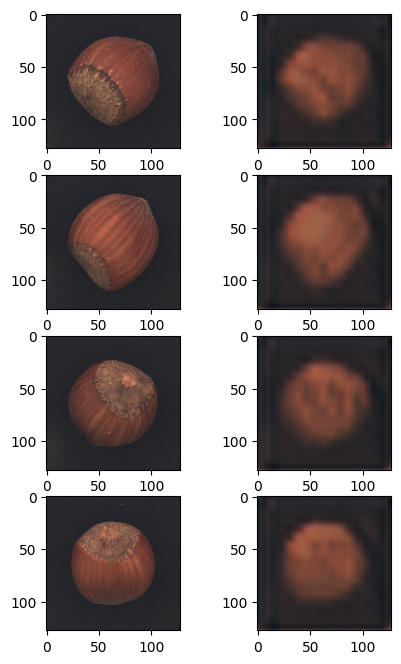

In [6]:
# Test the model by viewing a sample of original and reconstructed images
data_list = []
batch_index = 0
while batch_index <= validation_data.batch_index:
    data = validation_data.next()
    data_list.append(data[0])
    batch_index = batch_index + 1

predicted = model.predict(data_list[0])
no_of_samples = 4
_, axs = plt.subplots(no_of_samples, 2, figsize=(5, 8))
axs = axs.flatten()
imgs = []
for i in range(no_of_samples):
    imgs.append(data_list[0][i])
    imgs.append(predicted[i])
for img, ax in zip(imgs, axs):
    ax.imshow(img)
plt.show()

2/2 [==============================] - 0s 41ms/step


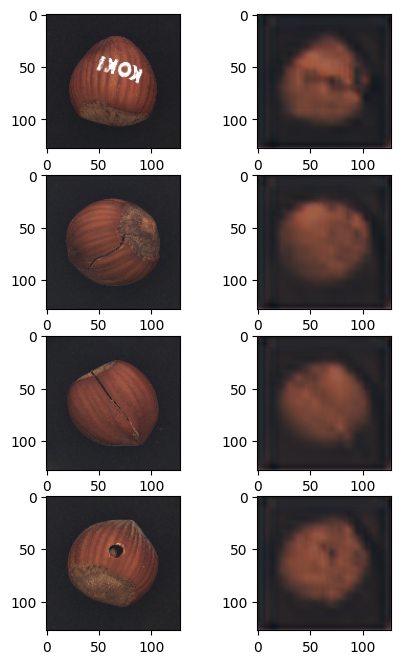

In [7]:
# Test the model by viewing a sample of original and reconstructed images
data_list = []
batch_index = 0
while batch_index <= anomaly_data.batch_index:
    data = anomaly_data.next()
    data_list.append(data[0])
    batch_index = batch_index + 1

predicted = model.predict(data_list[0])
no_of_samples = 4
_, axs = plt.subplots(no_of_samples, 2, figsize=(5, 8))
axs = axs.flatten()
imgs = []
for i in range(no_of_samples):
    imgs.append(data_list[0][i])
    imgs.append(predicted[i])
for img, ax in zip(imgs, axs):
    ax.imshow(img)
plt.show()

In [8]:
validation_error = model.evaluate(validation_data)
anomaly_error = model.evaluate(anomaly_data)

print("Recon. error for the validation (normal) data is: ", validation_error)
print("Recon. error for the anomaly data is: ", anomaly_error)

2/2 [==============================] - 3s 214ms/step - loss: 0.0028
Recon. error for the validation (normal) data is:  0.001305123558267951
Recon. error for the anomaly data is:  0.0028389140497893095


In [9]:
# Create a function for classifying images in bulk (for testing purposes)
def get_mse(original, reconstruction):
    # Returns the mean square error for each image in the array
    return np.mean((original - reconstruction)**2, axis=(1,2,3)) 

In [10]:
normal_images = validation_data.next()[0]
normal_reconstructions = model.predict(normal_images)
normal_MSEs = get_mse(normal_images, normal_reconstructions)

2/2 [==============================] - 0s 13ms/step


In [11]:
anomaly_images = anomaly_data.next()[0]
anomaly_reconstructions = model.predict(anomaly_images)
anomaly_MSEs = get_mse(anomaly_images, anomaly_reconstructions)

2/2 [==============================] - 0s 40ms/step


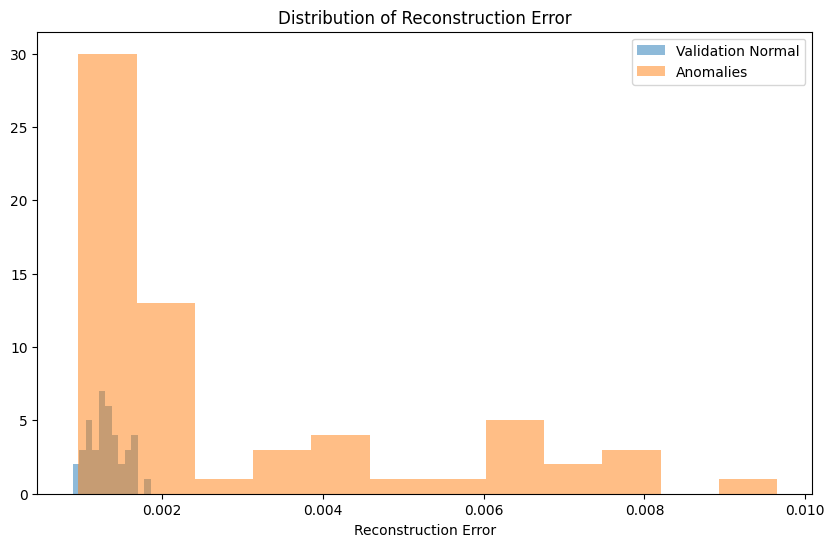

In [12]:
# Plotting the density distributions of the validation (normal) and anomalous images
# Ideally we want to see high separation between the normal and anomalous classes
plt.figure(figsize = (10,6))
plt.title('Distribution of Reconstruction Error')
plt.hist(normal_MSEs, 12, alpha=0.5, label='Validation Normal')
plt.hist(anomaly_MSEs, 12, alpha=0.5, label='Anomalies')
plt.legend(loc='upper right')
plt.xlabel('Reconstruction Error')

plt.show()